# 第九章　自然エネルギー利用設備 / Chapter 9 PV System

## 第一節　太陽光発電設備 / Section 1  Solar power plant

In [1]:
import numpy as np

# 試算例

### 初期条件

In [2]:
def get_default_pv():

    base = {'region' : 6, 'sol_region' : 3} 
    etr_IN_r = 0.927
    panel_lists = [{'P_p_i' : 2, 'pv_type' : '結晶シリコン系', 'pv_setup' : '屋根置き型', 'P_alpha' : 0, 'P_beta' : 30}]
    
    return base, etr_IN_r, panel_lists

### 計算

In [3]:
def calc_results(base, etr_IN_r, panel_lists):
    
    from pyhees.section9_1 import calc_E_E_PV_d_t
    from pyhees.section11_2 import load_solrad
    from pyhees.section2_1_b import get_f_prim

    # degreeをradianに変換
    panel_lists_radians = []
    for panel_list in panel_lists:

        panel_list['P_alpha'] = np.radians(panel_list['P_alpha'])
        panel_list['P_beta'] = np.radians(panel_list['P_beta'])
    
        panel_lists_radians = panel_lists_radians + [panel_list]

    PV_radians = {'etr_IN_r': etr_IN_r, 'panels': panel_lists_radians}
    # print(f'PV_radians:{PV_radians}')
    solrad = load_solrad(**base)
    E_PV_d_t = calc_E_E_PV_d_t(PV_radians, solrad)
    f_prim = get_f_prim()
    E_PV_annual = np.sum(E_PV_d_t)

    print("PV発電量:{}kWh/a(={}MJ/a)".format(int(E_PV_annual), E_PV_annual * f_prim / 1000))
    
    return E_PV_d_t

In [4]:
def get_each_graph(res):

    import matplotlib.pyplot as plt

    # 日別、時別値を作成
    res_day = np.mean(res.reshape(365,24), axis=1)
    res_hr = np.mean(res.reshape(365,24), axis=0)

    fig = plt.figure(figsize=(20,12))
    
    grh = fig.add_subplot(311)
    grh.plot(res)
    grh.set_ylabel("kWh/h")
    grh.set_xlabel("hour")
    
    grh_day = fig.add_subplot(312)
    grh_day.plot(res_day)
    grh_day.set_ylabel("kWh/h")
    grh_day.set_xlabel("day")
    
    grh_hr = fig.add_subplot(313)
    grh_hr.plot(res_hr)
    grh_hr.set_ylabel("kWh/h")
    grh_hr.set_xlabel("hour")
    plt.show()


### 計算条件1

初期条件での計算

In [5]:
base, etr_IN_r, panel_lists = get_default_pv()
E_PV_d_t_1 = calc_results(base, etr_IN_r, panel_lists)

PV発電量:1998kWh/a(=19502.231558467003MJ/a)


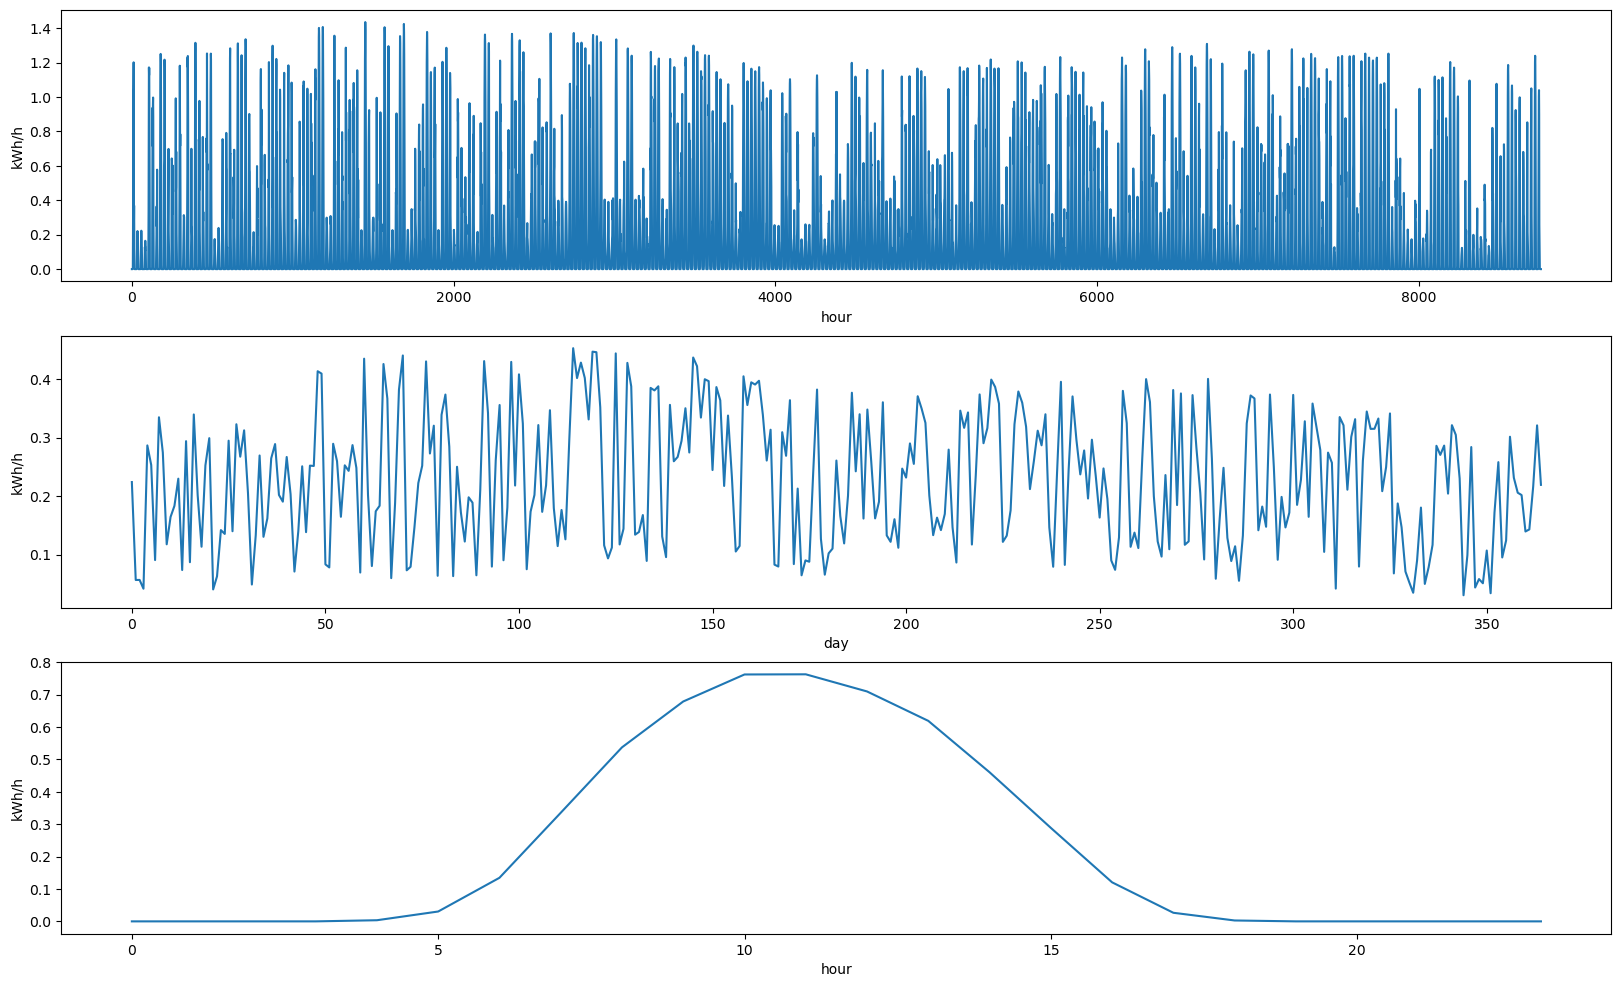

In [6]:
get_each_graph(E_PV_d_t_1)

### 計算条件2

- 地域区分を3に変更
- 日射地域区分を2に変更

In [7]:
base, etr_IN_r, panel_lists = get_default_pv()
base['region'] = 3
base['sol_region'] = 2
E_PV_d_t_2 = calc_results(base, etr_IN_r, panel_lists)

PV発電量:1861kWh/a(=18172.92602473896MJ/a)


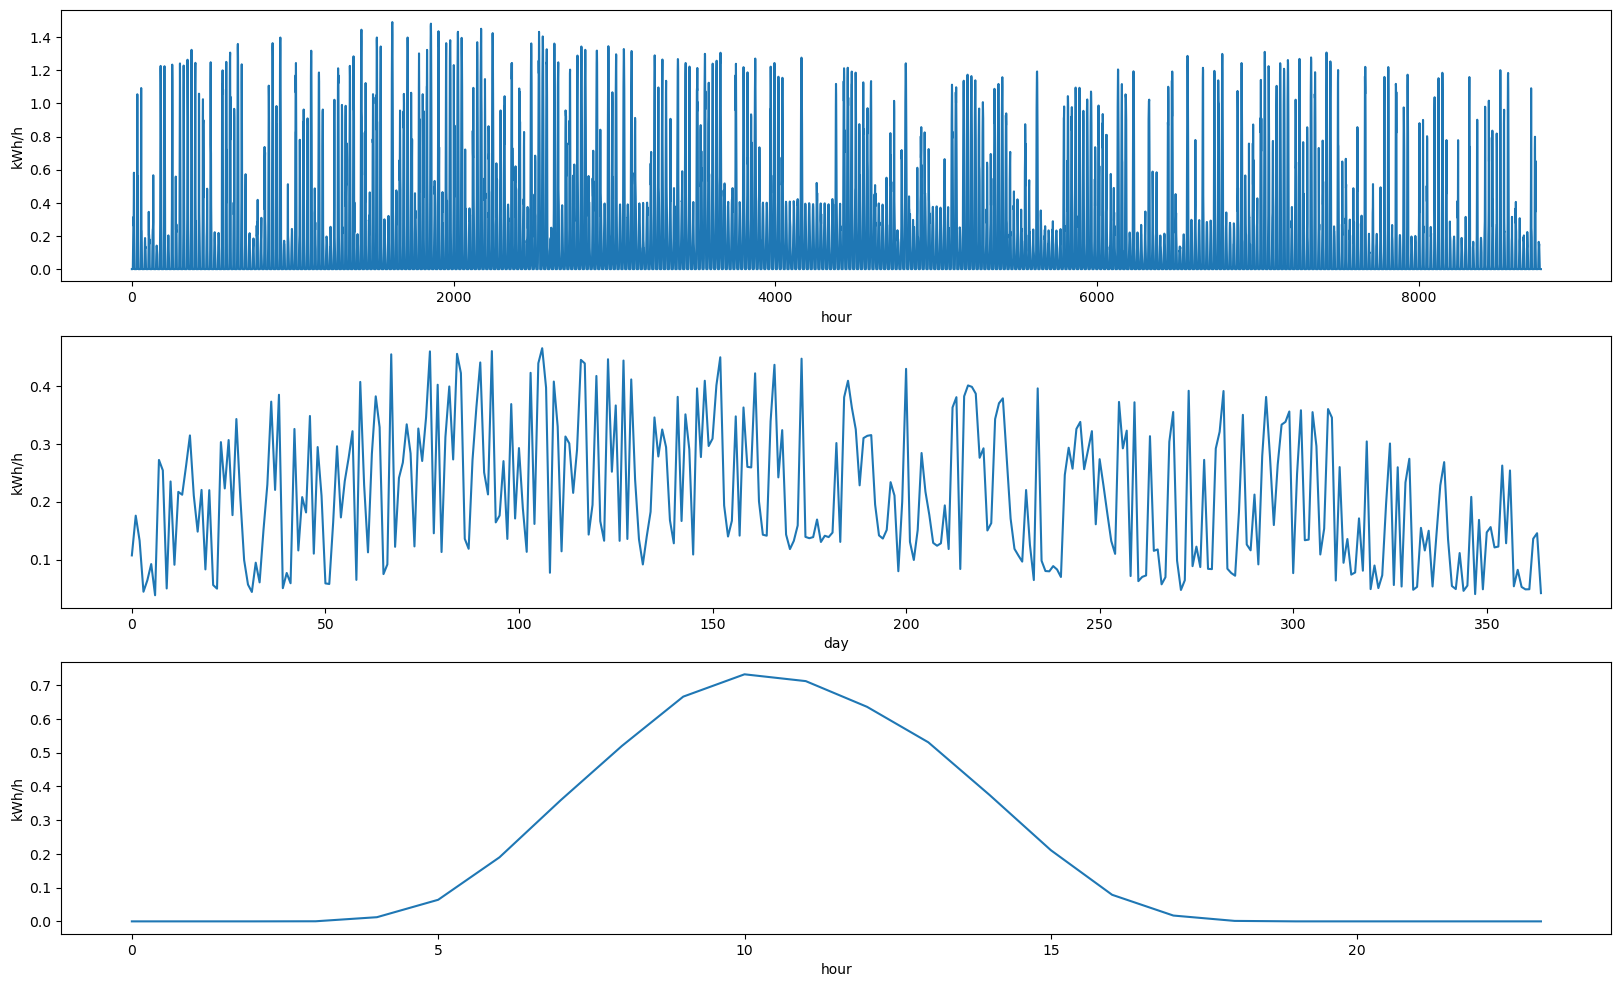

In [8]:
get_each_graph(E_PV_d_t_2)

### 計算条件3

- パワーコンディショナの定格負荷効率0.90に変更
- 太陽電池アレイのシステム容量を3.0kWに変更
- 太陽電池アレイを結晶シリコン系以外の太陽電池に変更
- 太陽電池アレイ設置方式を架台設置形に変更
- パネルの設置方位を90°に変更
- パネル設置傾斜角を40°に変更

In [9]:
base, etr_IN_r, panel_lists = get_default_pv()
etr_IN_r = 0.90
panel_lists[0] = {'P_p_i' : 3, 'pv_type' : '結晶シリコン系以外', 'pv_setup' : '架台設置型', 'P_alpha' : 90, 'P_beta' : 40}

E_PV_d_t_3 = calc_results(base, etr_IN_r, panel_lists)

PV発電量:2464kWh/a(=24057.378030857064MJ/a)


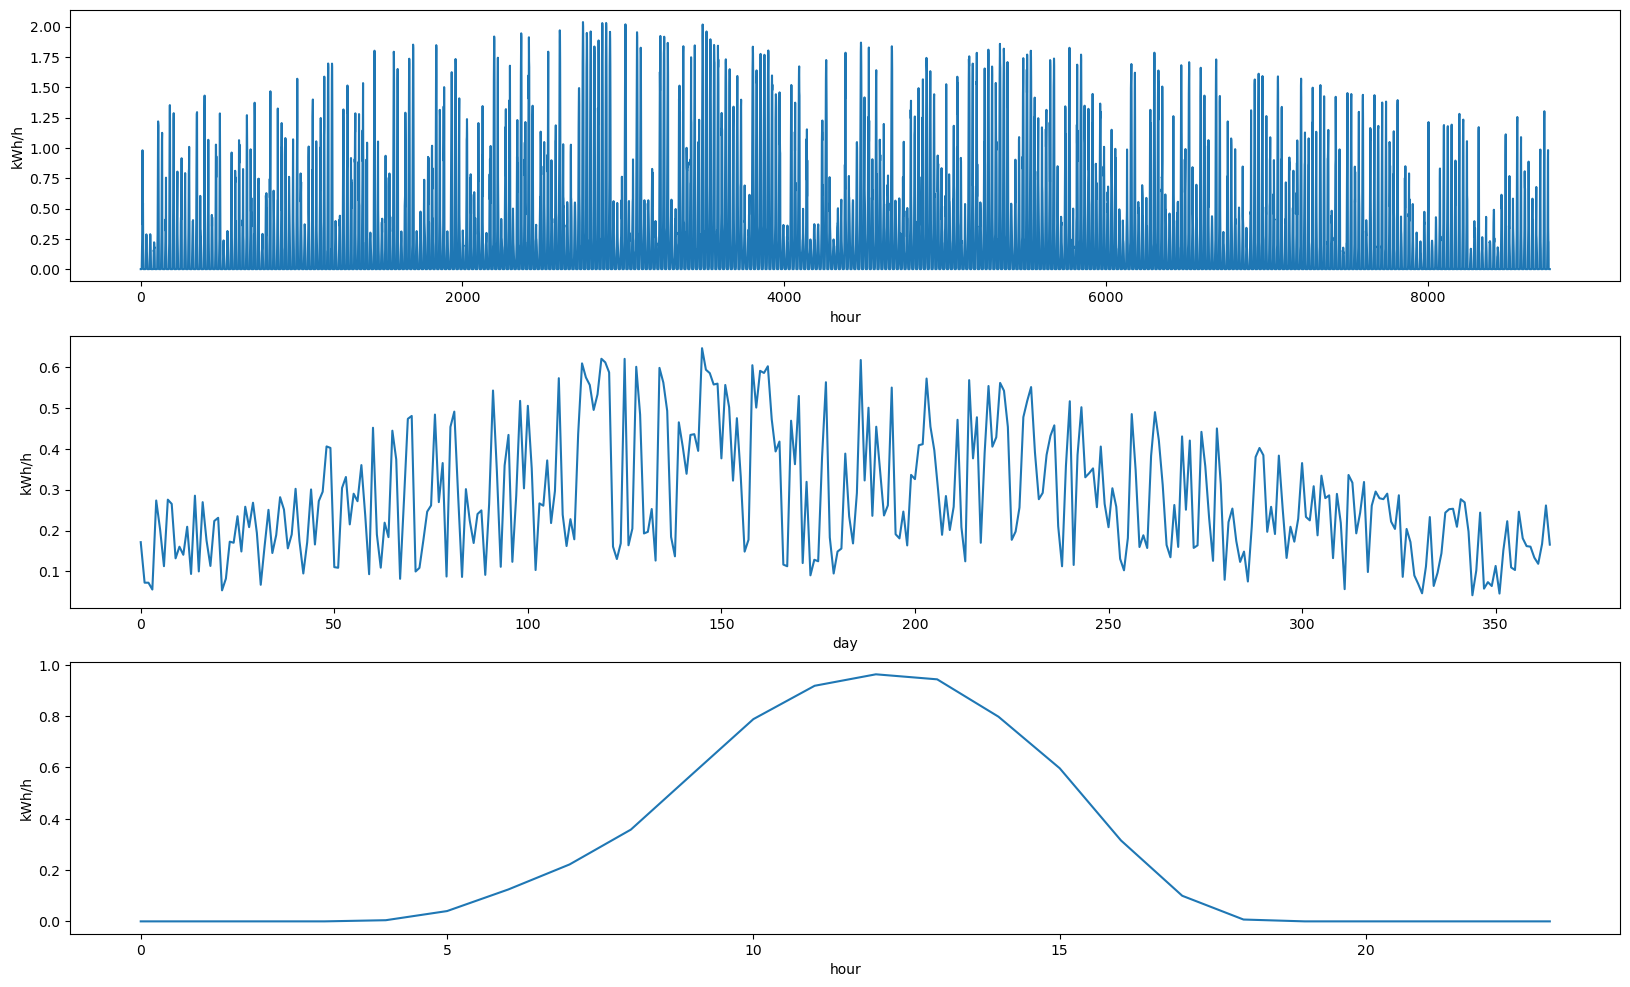

In [10]:
get_each_graph(E_PV_d_t_3)

### 計算条件4

- 方位の異なるパネルの面数を2面に追加

In [11]:
base, etr_IN_r, panel_lists = get_default_pv()
panel_lists = [{'P_p_i' : 2, 'pv_type' : '結晶シリコン系', 'pv_setup' : '屋根置き型', 'P_alpha' : 0, 'P_beta' : 30}, 
               {'P_p_i' : 2, 'pv_type' : '結晶シリコン系', 'pv_setup' : '屋根置き型', 'P_alpha' : 90, 'P_beta' : 0}
               ]
E_PV_d_t_4 = calc_results(base, etr_IN_r, panel_lists)

PV発電量:3876kWh/a(=37839.060600883255MJ/a)


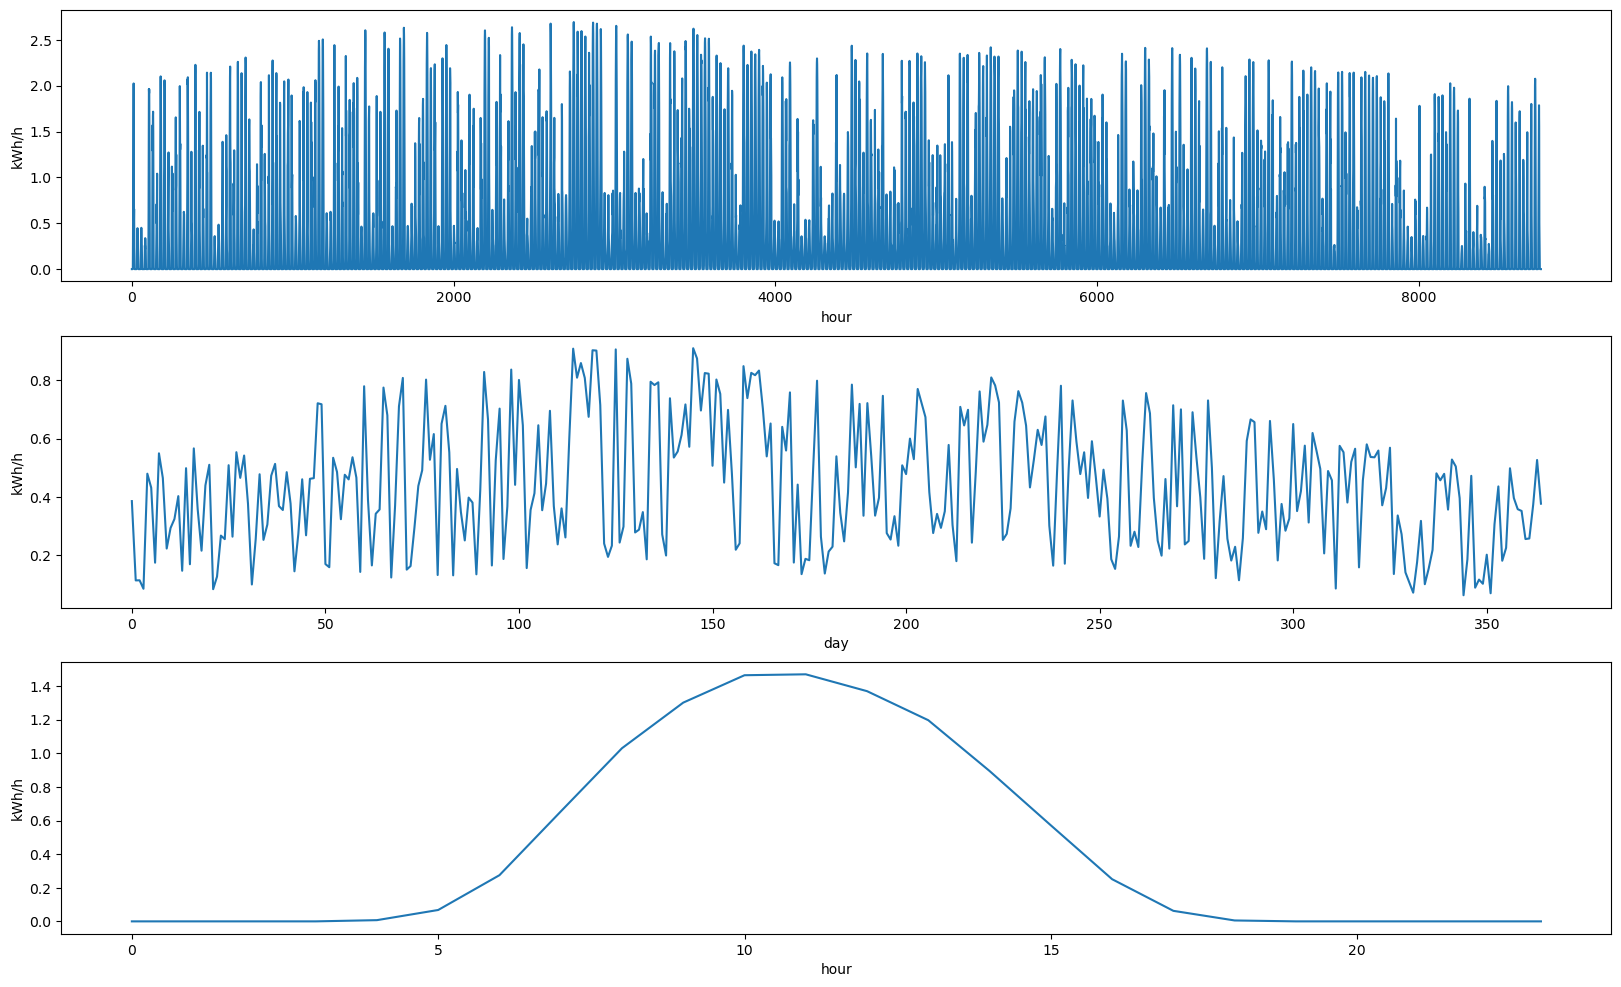

In [12]:
get_each_graph(E_PV_d_t_4)

## 比較

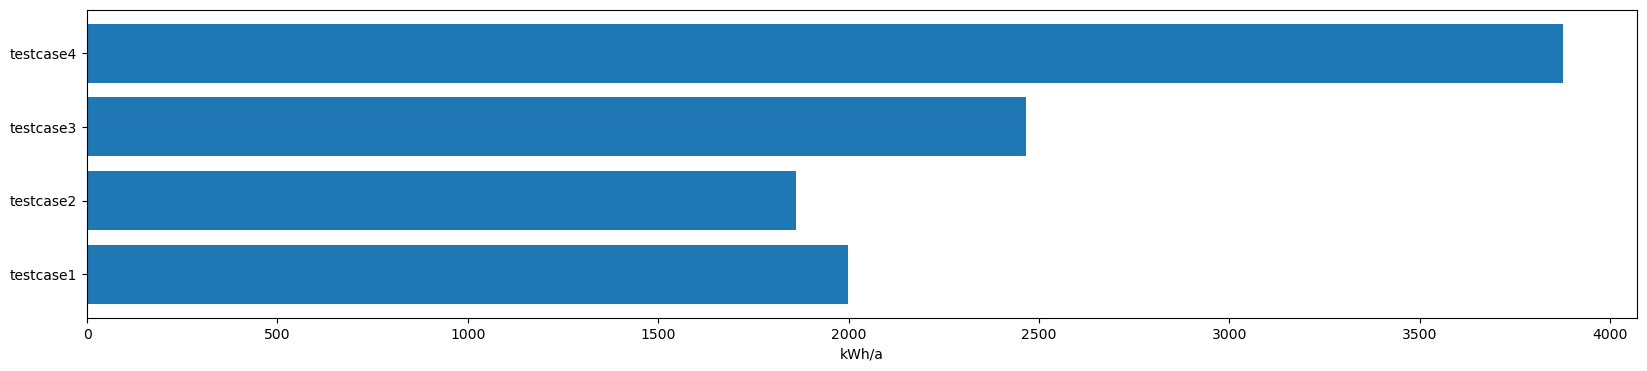

In [13]:
import matplotlib.pyplot as plt

dat = {"testcase1":sum(E_PV_d_t_1),"testcase2" : sum(E_PV_d_t_2), "testcase3" : sum(E_PV_d_t_3), "testcase4" : sum(E_PV_d_t_4)}
xx = list(dat.keys())
yy = list(dat.values())

fig = plt.figure(figsize=(20,4))
axt = fig.add_subplot(111)
axt.barh(xx,yy)
axt.set_xlabel("kWh/a")
plt.show()
